In [118]:
#Les librairies nécessaires sont importées

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
#Les données contenues dans le fichier csv fourni sont lues via panda
dataHubble = pd.read_csv("hubble_data.csv", sep=",")

In [120]:
# un objet de régression linéaire de Scikit-learn est créé
regr = linear_model.LinearRegression()

In [121]:
# on reformate les données en matrices à une colonne afin qu'elles puissent être lues dans scikit-learn
distanceVector = dataHubble["distance"]
distanceVector = distanceVector[:,np.newaxis]

velocityVector = dataHubble["recession_velocity"]
velocityVector = velocityVector[:,np.newaxis]

In [122]:
# on effectue le fit de la régression linéaire
regr.fit(distanceVector, velocityVector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
#On utilise le fit de la régression linéaire calculée à la ligne précédente pour obtenir une prédiction de la vitesse en fonction de la distance
velocityPred = regr.predict(distanceVector)

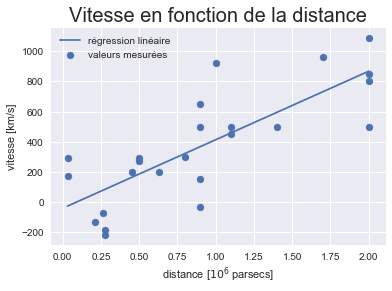

In [125]:
# On compare la droite représentant la vitesse prédite en fonction de la distance par rapport aux points réels de la base de données
sns.set()
plt.scatter(distanceVector, velocityVector,label="valeurs mesurées")
plt.plot(distanceVector, velocityPred, label= "régression linéaire")

plt.title("Vitesse en fonction de la distance", size=20)

plt.xticks()
plt.yticks()

plt.xlabel('distance [$10^6$ parsecs]')
plt.ylabel('vitesse [km/s]')

plt.legend()

plt.show()

In [126]:
# Quelques informations sur la régression linéaire. Le premier coefficient 
#correspond au coefficient de proportionalité de la vitesse en fonction de la distance
# calculé via la régression linéaire. On retrouve une valeur proche de celle donnée dans 
#l'article qui était 465

print('Coefficients: \n')
print("Regression coefficient (Coefficient de proportionnalité): ", regr.coef_,"km/sec.par 10^6 parsecs")
print("à comparer au coefficient K avancé dans l'article: ", 465,'km/sec.par 10^6 parsecs \n')

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(velocityVector, velocityPred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(velocityVector, velocityPred))

Coefficients: 

Regression coefficient (Coefficient de proportionnalité):  [[ 454.15844092]] km/sec.par 10^6 parsecs
à comparer au coefficient K avancé dans l'article:  465 km/sec.par 10^6 parsecs 

Mean squared error: 49726.77
Variance score: 0.62
